In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [2]:
import decoding_analysis_vis as dav
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import xarray as xr

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [13]:
tmp = dav.SimpleSession(verbose=1, session_id=0, 
                        shuffle_trial_labels=False,
                        shuffle_timepoints=False,
                        bool_filter_neurons=True)

session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons


In [14]:
tmpr = tmp.dataset_selector(region='s2', remove_added_dimensions=True,
                            sort_neurons=False, trial_type_list=['sensory', 'sham'])

Text(0, 0.5, 'Frequency ')

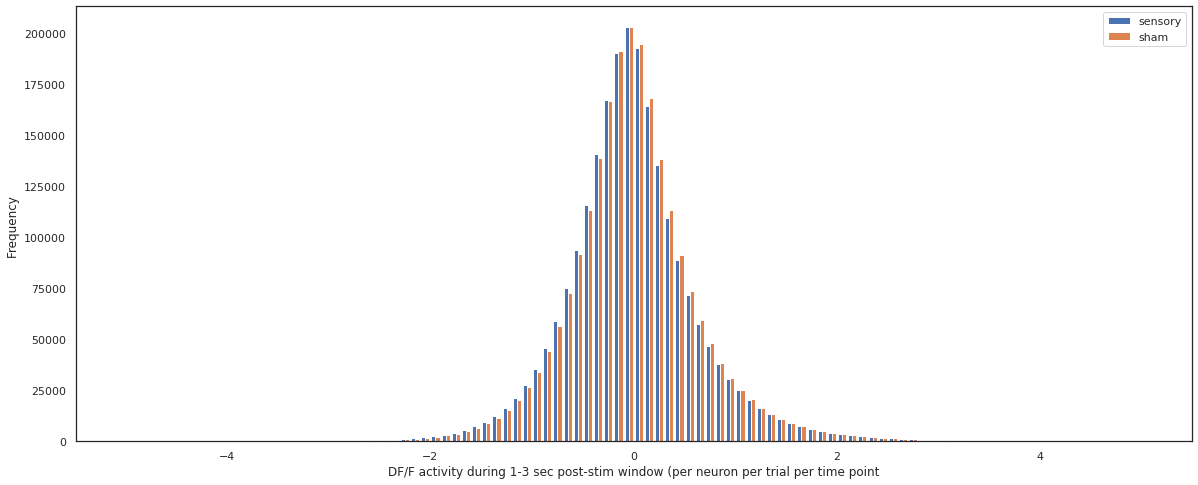

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
tmphist = ax.hist([tmpr.activity.where(tmpr.trial_type==tt, drop=True).data[:, 45:75, :].ravel() for tt in ['sensory', 'sham']],
            label=['sensory', 'sham'], bins=np.linspace(-5, 5, 101))
ax.legend()
# ax.set_yscale('log')
ax.set_xlabel('DF/F activity during 1-3 sec post-stim window (per neuron per trial per time point')
ax.set_ylabel('Frequency ')

[2321632. 2321608.]


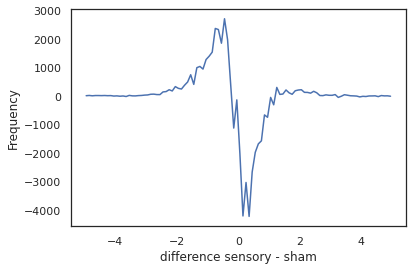

In [38]:
plt.plot((tmphist[1][1:] + tmphist[1][:-1]) * 0.5, tmphist[0][0, :] - tmphist[0][1, :])
plt.xlabel('difference sensory - sham')
plt.ylabel('Frequency')

print(tmphist[0].sum(1))

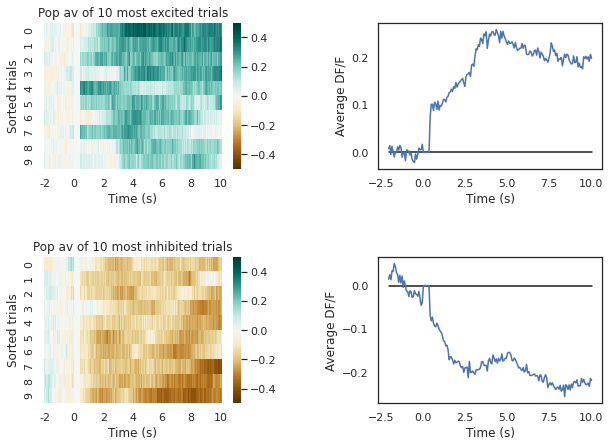

In [5]:
tmp_data = tmpr.activity.mean('neuron').data.transpose()
inds_sorted_trials = np.argsort(tmp_data.sum(1))[::-1]
tmp_data = tmp_data[inds_sorted_trials, :]
# print(tmp_data.shape)
fig, ax = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'wspace': 0.5, 'hspace': 0.6})

n_trials = 10
for i_plot in range(2):
    if i_plot == 1:
        tmp_data_plot = tmp_data[-n_trials:, :]
        ax[i_plot, 0].set_title(f'Pop av of {n_trials} most inhibited trials')
    else:
        tmp_data_plot = tmp_data[:n_trials, :]
        ax[i_plot, 0].set_title(f'Pop av of {n_trials} most excited trials')
    sns.heatmap(tmp_data_plot, cmap='BrBG', ax=ax[i_plot, 0], vmin=-0.5, vmax=0.5)
    ax[i_plot, 0].set_ylabel('Sorted trials')
    ax[i_plot, 1].set_xlabel('Time (s)')
    ax[i_plot, 0].set_xticks([np.argmin(np.abs(tmpr.time.data - x)) for x in [-2, 0, 2, 4, 6, 8, 10]])
    ax[i_plot, 0].set_xticklabels([-2, 0, 2, 4, 6, 8, 10], rotation=0)
    ax[i_plot, 1].plot([tmpr.time[0], tmpr.time[-1]], [0, 0], c='k')
    ax[i_plot, 1].plot(tmpr.time, tmp_data_plot.mean(0))
    ax[i_plot, 0].set_xlabel('Time (s)')
    ax[i_plot, 1].set_ylabel('Average DF/F')

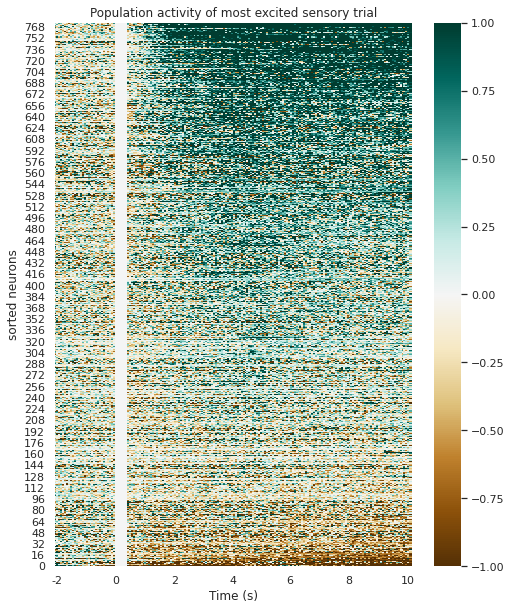

In [25]:
plot_data = tmpr.activity.isel(trial=inds_sorted_trials[0]).data
inds_sorted_neurons = np.argsort(plot_data.mean(1))
plot_data = plot_data[inds_sorted_neurons]

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
sns.heatmap(plot_data, cmap='BrBG', vmin=-1, vmax=1, ax=ax)
ax.set_ylabel('sorted neurons')
ax.set_xlabel('Time (s)')
dav.create_time_axis(ax=ax, time_arr=tmpr.time.data, label_list=[-2, 0, 2, 4, 6, 8, 10])
ax.set_title('Population activity of most excited sensory trial')
ax.invert_yaxis()

/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered 

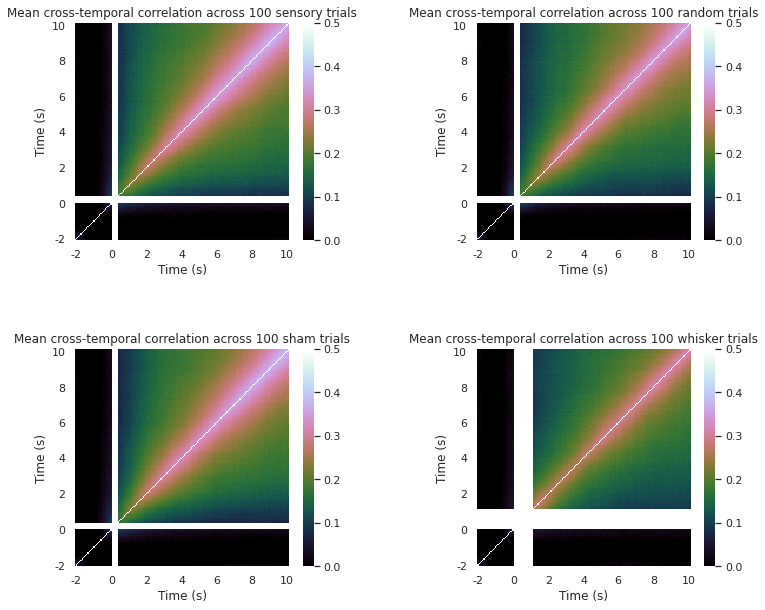

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_col, i_row = 0, 0 
for i_tt, tt in enumerate(['sensory', 'random', 'sham', 'whisker']):
    curr_ax = ax[i_row, i_col]
    dav.plot_cross_temp_corr(ds=tmpr.where(tmpr.trial_type == tt, drop=True), 
                             name=tt, ax=curr_ax)

    i_col += 1
    if i_col == 2:
        i_col = 0
        i_row += 1

/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/tplas/anaconda3/envs/robs/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Mean sensory -  random cross-temporal correlation')

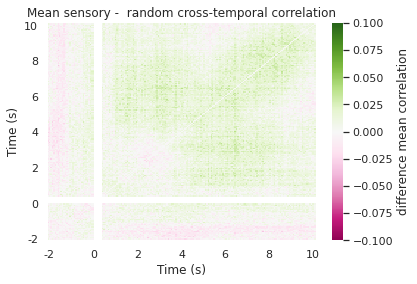

In [59]:
tt_1 = 'sensory'
tt_2 = 'random'

ds = tmpr.where(tmpr.trial_type == tt_1, drop=True)
tmpcor1 = np.stack([np.corrcoef(ds.activity.isel(trial=x).data.transpose()) for x in range(100)]).mean(0)
ds = tmpr.where(tmpr.trial_type == tt_2, drop=True)
tmpcor2 = np.stack([np.corrcoef(ds.activity.isel(trial=x).data.transpose()) for x in range(100)]).mean(0)

ax = plt.subplot(111)
sns.heatmap(tmpcor1 - tmpcor2, cmap='PiYG', vmin=-0.1, vmax=0.1, ax=ax,
            cbar_kws={'label': 'difference mean correlation'})
ax.invert_yaxis()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Time (s)')
dav.create_time_axis(ax=ax, time_arr=tmpr.time.data, axis='x')
dav.create_time_axis(ax=ax, time_arr=tmpr.time.data, axis='y')
ax.set_title(f'Mean {tt_1} -  {tt_2} cross-temporal correlation')

In [47]:
tmpcor2.shape

(10, 182, 182)

No handles with labels found to put in legend.


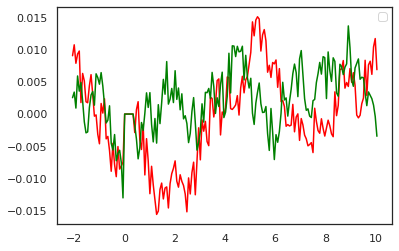

In [68]:
tmp_data_dict = {}
time_av_responses_dict = {}
tt_list = ['sensory', 'sham']
for i_tt, tt in enumerate(tt_list):
    tmp_data_dict[tt] = tmpr.activity.where(tmpr.trial_type == tt, drop=True).mean('neuron').data.transpose()
    inds_sorted_trials = np.argsort(tmp_data_dict[tt].sum(1))[::-1]
    tmp_data_dict[tt] = tmp_data_dict[tt][inds_sorted_trials, :]
    time_av_responses_dict[tt] = tmp_data_dict[tt][:, 45:75].mean(1)
    assert len(time_av_responses_dict[tt]) == 100


    if i_tt == 0:
        colour = 'red'
    else:
        colour = 'green'
    # plt.plot(tmp_data_dict[tt][:, :].transpose(), label=tt, alpha=0.7, c=colour)
    plt.plot(tmpr.time, tmp_data_dict[tt].mean(0), c=colour, label=tt)
# plt.hist([time_av_responses_dict[tt] for tt in tt_list], bins=np.linspace(-0.3, 0.3, 20), 
#             color=['red', 'green'], label=tt_list)

plt.legend()


Classify based on average activity in post-stim window. 
- Construct a classifier manually (by using the average)

  0%|          | 0/6 [00:00<?, ?it/s]

session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons
Number of correctly classified trials of random: 52
Number of correctly classified trials of sham: 45
Two-sided p value of random = 0.9779503731003527
Two-sided p value of sham = 0.11494688538006195
Number of correctly classified trials of sensory: 57
Number of correctly classified trials of sham: 47


 17%|█▋        | 1/6 [01:24<07:04, 84.86s/it]

Two-sided p value of sensory = 0.4046196190950213
Two-sided p value of sham = 0.3843578480060411
session name : 2020-09-08_RL099.pkl
Excluded 276 out of 2095 neurons
Number of correctly classified trials of random: 52
Number of correctly classified trials of sham: 53
Two-sided p value of random = 0.9691353558637886
Two-sided p value of sham = 0.756965785429281
Number of correctly classified trials of sensory: 56
Number of correctly classified trials of sham: 50


 33%|███▎      | 2/6 [02:17<04:23, 65.99s/it]

Two-sided p value of sensory = 0.3477649322531349
Two-sided p value of sham = 0.5969237637348803
session name : 2020-09-14_RL101.pkl
Excluded 602 out of 2169 neurons
Number of correctly classified trials of random: 54
Number of correctly classified trials of sham: 48
Two-sided p value of random = 0.6286868827280401
Two-sided p value of sham = 0.33532746732377683


 50%|█████     | 3/6 [03:24<03:18, 66.26s/it]

Number of correctly classified trials of sensory: 51
Number of correctly classified trials of sham: 55
Two-sided p value of sensory = 0.757213108220843
Two-sided p value of sham = 0.4194770678172388
session name : 2020-09-16_RL103.pkl
Excluded 461 out of 2106 neurons
Number of correctly classified trials of random: 57
Number of correctly classified trials of sham: 59
Two-sided p value of random = 0.10123379916435321
Two-sided p value of sham = 0.02024476255136525
Number of correctly classified trials of sensory: 58
Number of correctly classified trials of sham: 54


 67%|██████▋   | 4/6 [04:16<02:01, 60.72s/it]

Two-sided p value of sensory = 0.08670444790236934
Two-sided p value of sham = 0.5880013591596992
session name : 2020-10-02_RL108.pkl
Excluded 969 out of 2563 neurons
Number of correctly classified trials of random: 56
Number of correctly classified trials of sham: 46
Two-sided p value of random = 0.48260793104384503
Two-sided p value of sham = 0.26845279336815775
Number of correctly classified trials of sensory: 48
Number of correctly classified trials of sham: 54


 83%|████████▎ | 5/6 [05:17<01:00, 60.85s/it]

Two-sided p value of sensory = 0.33426803046104514
Two-sided p value of sham = 0.6525015323878893
session name : 2020-10-12_RL109.pkl
Excluded 843 out of 2515 neurons
Number of correctly classified trials of random: 52
Number of correctly classified trials of sham: 46
Two-sided p value of random = 0.985450818706396
Two-sided p value of sham = 0.1527025474485296
Number of correctly classified trials of sensory: 48
Number of correctly classified trials of sham: 53


100%|██████████| 6/6 [06:08<00:00, 61.43s/it]

Two-sided p value of sensory = 0.28061284265856534
Two-sided p value of sham = 0.8023196278037852


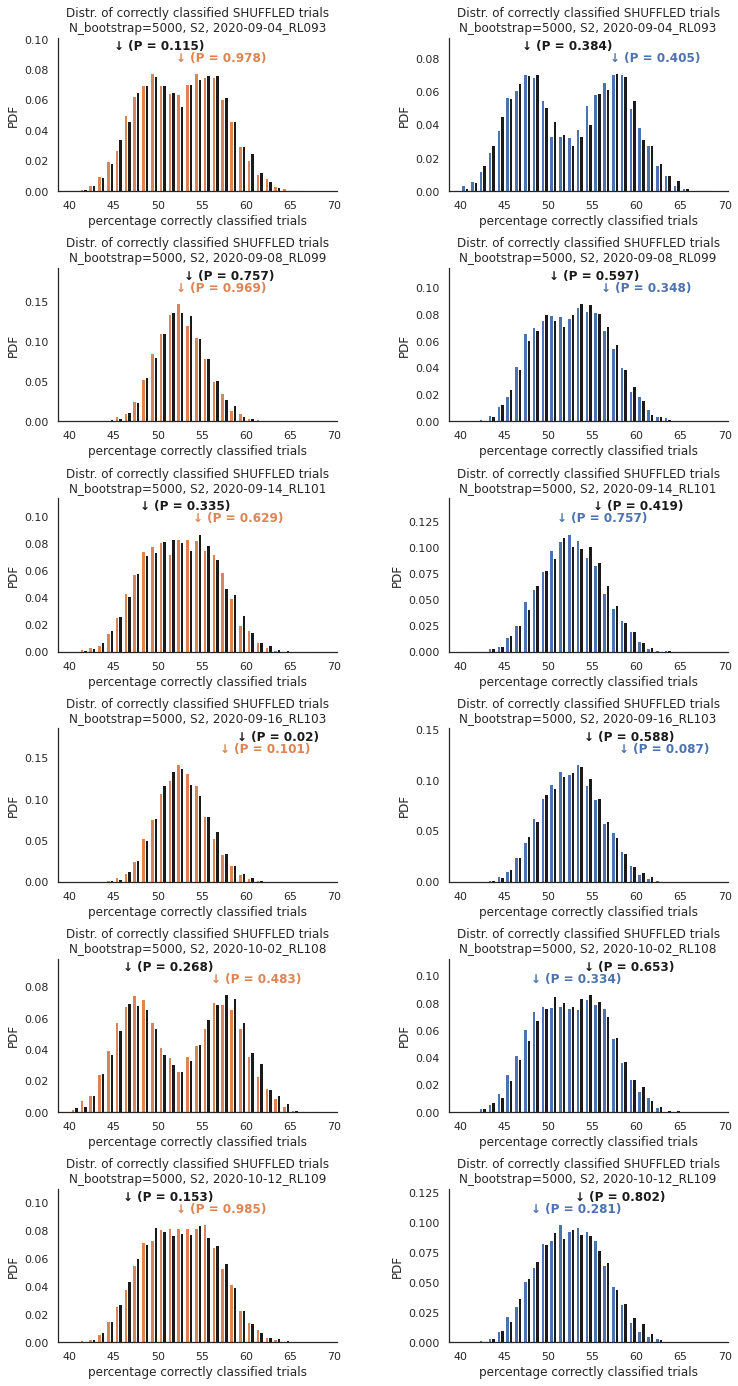

In [12]:
fig, ax = plt.subplots(6, 2, figsize=(12, 24), gridspec_kw={'wspace': 0.4, 'hspace': 0.5})

for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=1, sess_type='sens',
                            session_id=i_s, shuffle_trial_labels=False, bool_filter_neurons=True)
    dav.manual_poststim_response_classifier(Ses=tmp, ax=ax[i_s, 0], tt_1='random')
    dav.manual_poststim_response_classifier(Ses=tmp, ax=ax[i_s, 1], tt_1='sensory')

# plt.savefig('/home/tplas/repos/Vape/jupyter/thijs/figs/manual_classification_proj.pdf', bbox_to_anchor='tight')

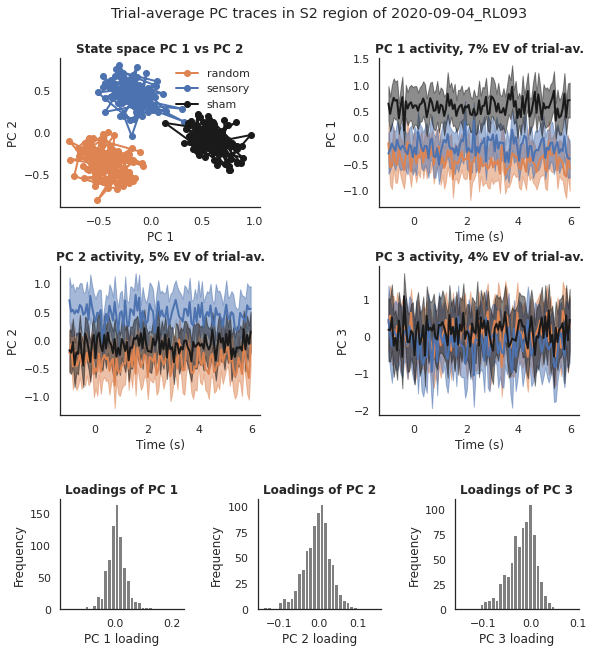

In [11]:
tmppca = dav.plot_pca_time_aggr_activity(Ses=tmp, trial_type_list=['sensory', 'random', 'sham'], 
                                         merge_trial_types_during_pca=True,
                                         plot_loadings=True,
                                         plot_indiv_trials=False,
                                         plot_ci=True, region='s2')

session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons
session name : 2020-09-08_RL099.pkl
Excluded 276 out of 2095 neurons
session name : 2020-09-14_RL101.pkl
Excluded 602 out of 2169 neurons
session name : 2020-09-16_RL103.pkl
Excluded 461 out of 2106 neurons
session name : 2020-10-02_RL108.pkl
Excluded 969 out of 2563 neurons
session name : 2020-10-12_RL109.pkl
Excluded 843 out of 2515 neurons


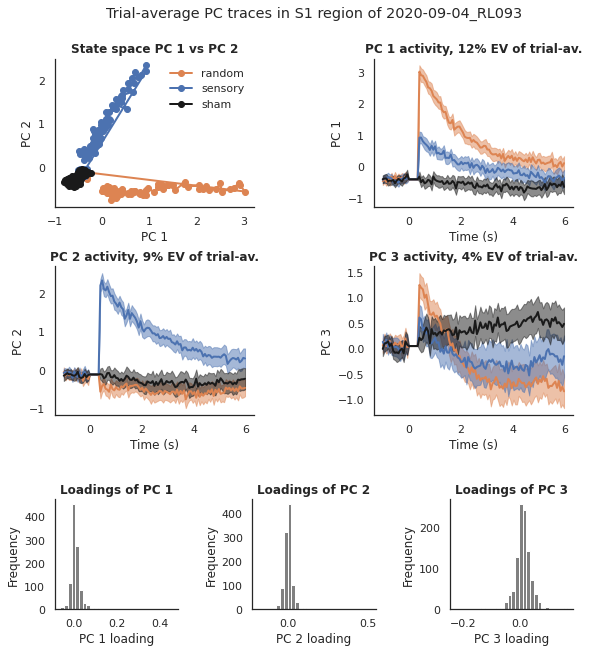

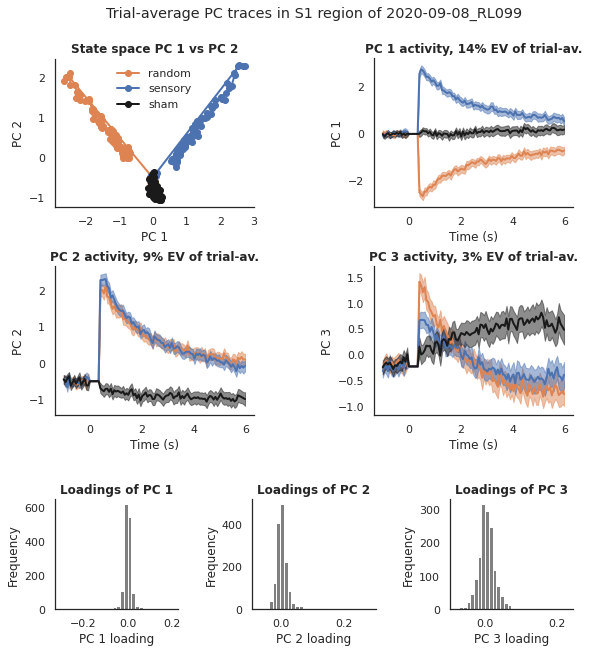

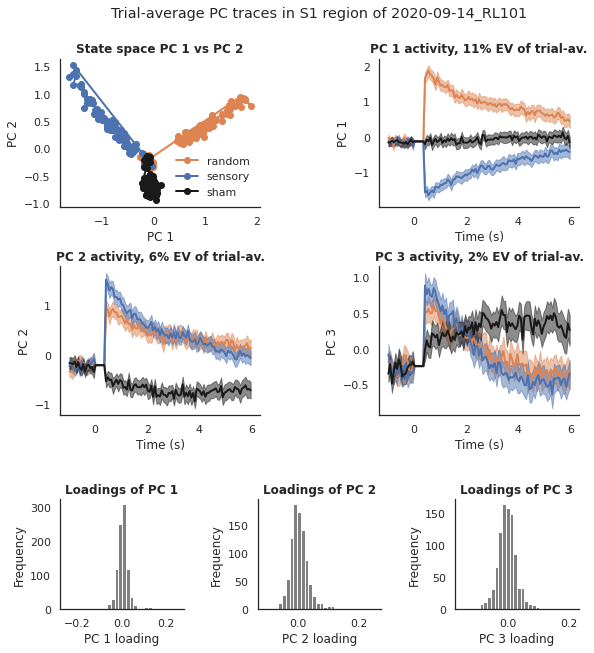

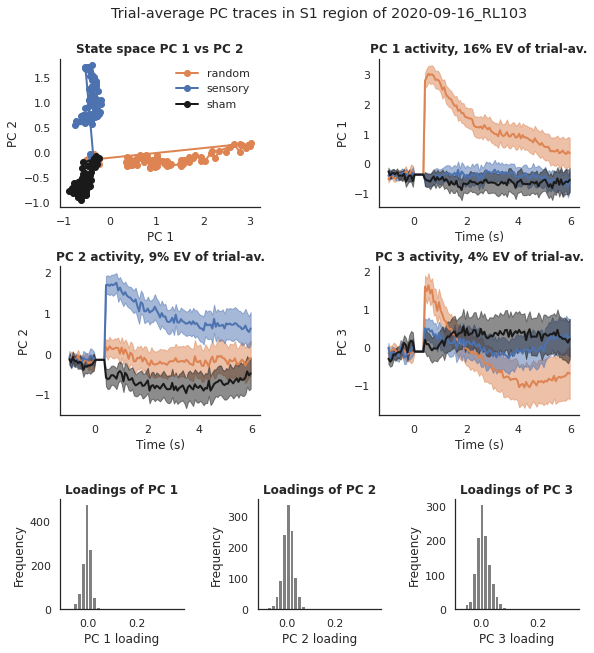

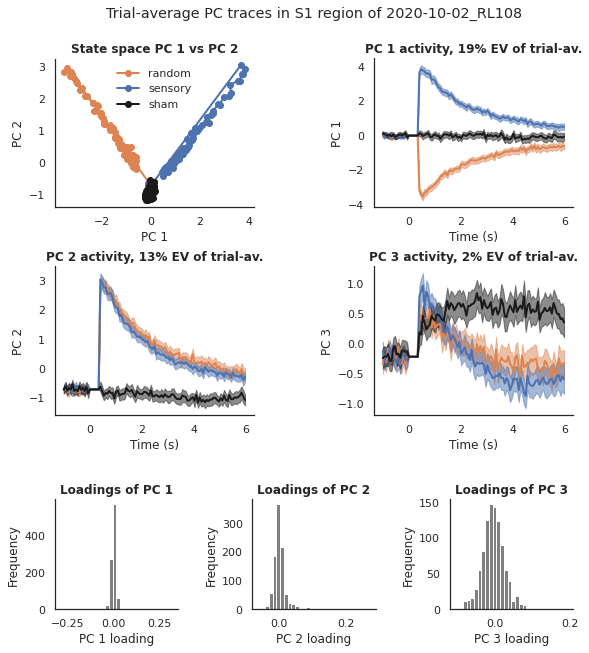

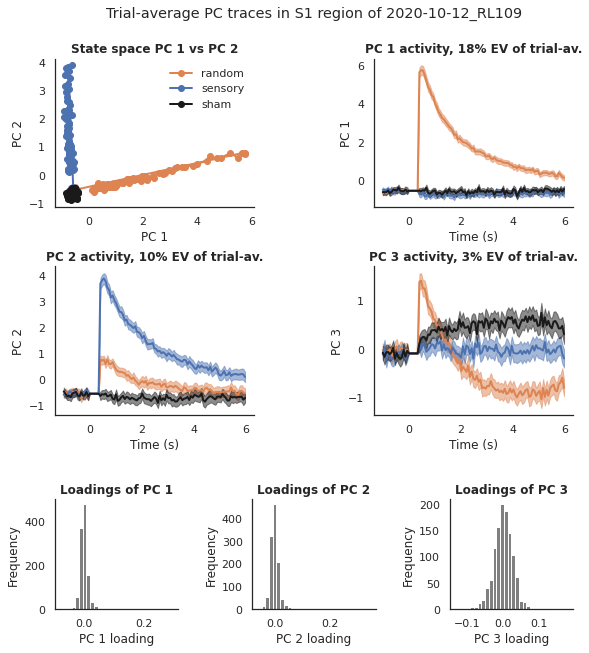

In [161]:
for sid in range(6):
    tmp = dav.SimpleSession(verbose=1, session_id=sid)
    dav.plot_pca_time_aggr_activity(Ses=tmp, trial_type_list=['sensory', 'random', 'sham'], 
                merge_trial_types_during_pca=True,
                save_fig=True, region='s1')

session name : 2021-02-18_RL127.pkl
Excluded 833 out of 2334 neurons
session name : 2021-02-22_RL128.pkl
Excluded 893 out of 2308 neurons
session name : 2021-02-23_RL129.pkl
Excluded 1323 out of 2364 neurons
session name : 2021-02-24_RL132.pkl
Excluded 757 out of 2156 neurons
session name : 2021-02-25_RL131.pkl
Excluded 1361 out of 2448 neurons
session name : 2021-03-02_RL130.pkl
Excluded 518 out of 2258 neurons


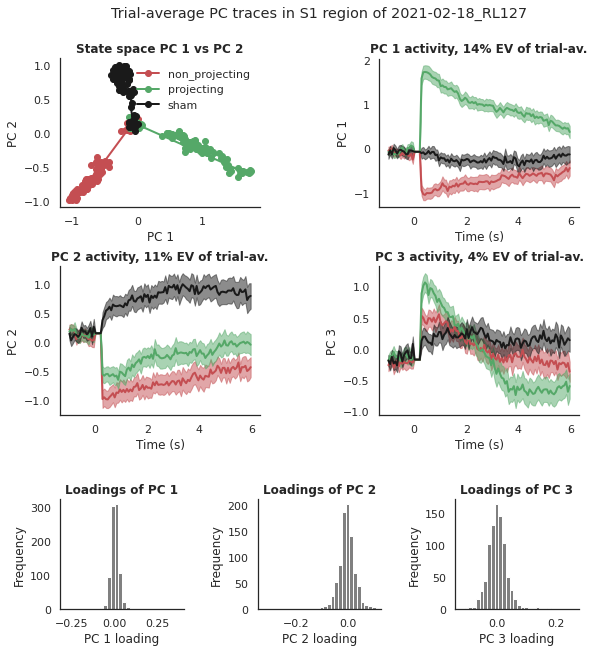

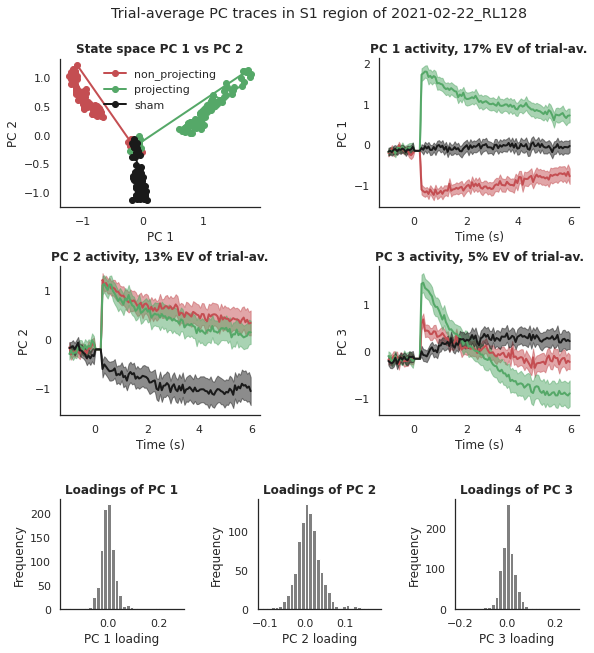

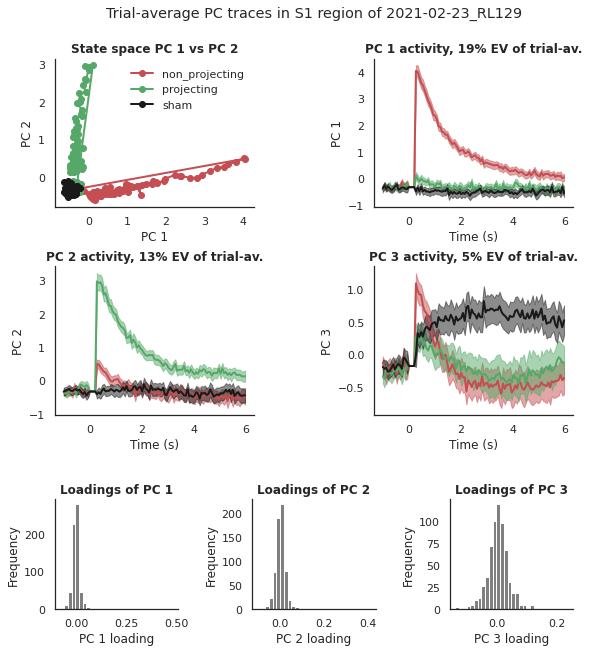

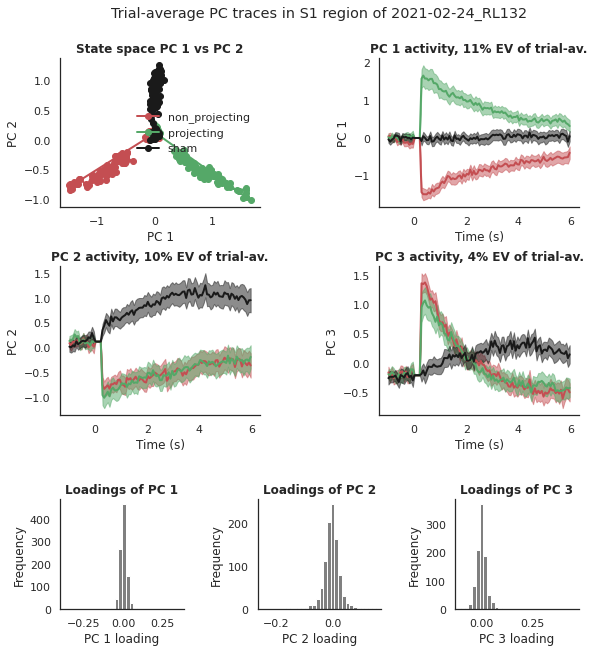

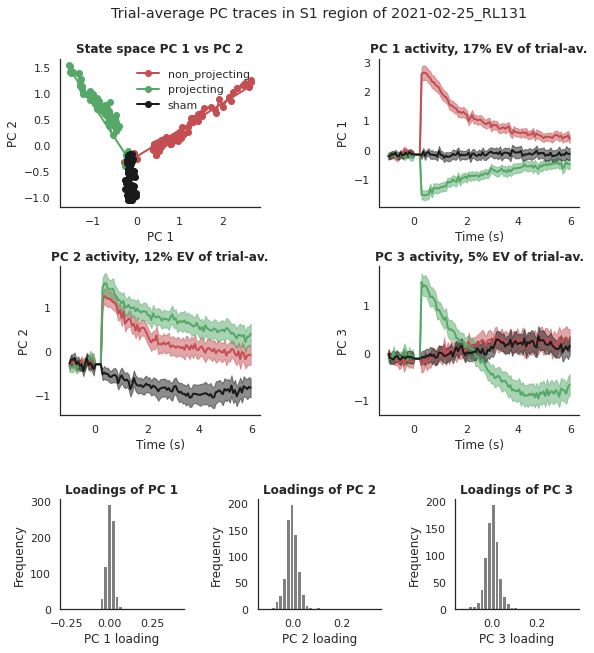

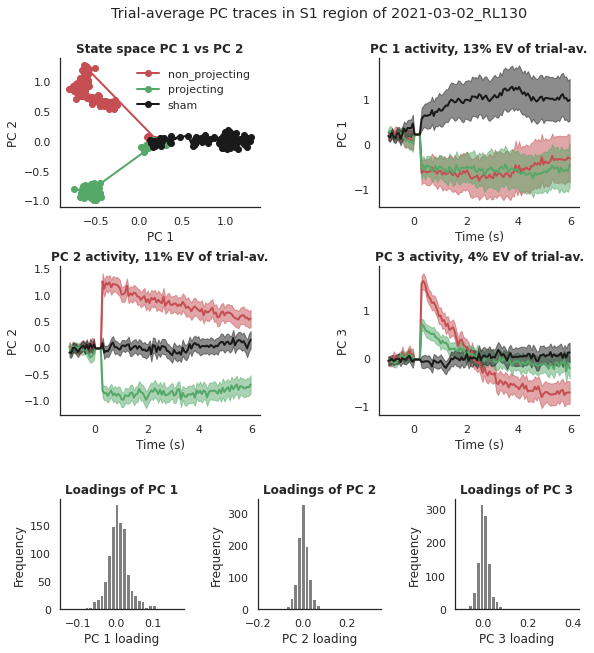

In [162]:
for sid in range(6):
    tmp = dav.SimpleSession(verbose=1, session_id=sid, sess_type='proj')
    dav.plot_pca_time_aggr_activity(Ses=tmp, trial_type_list=['projecting', 'non_projecting', 'sham'], merge_trial_types_during_pca=True,
                save_fig=True, region='s1')

Creating time aggregated data
<xarray.DataArray 'activity' (neuron: 774, trial: 400)>
array([[ 0.18858987,  0.46685526, -0.27100036, ...,  0.00693167,
         0.24362576, -0.05349078],
       [-0.1178965 ,  0.041265  ,  1.3447437 , ...,  0.20414238,
         0.21095489, -0.05407786],
       [ 2.7483902 ,  0.07292317, -0.05263437, ..., -0.11384263,
         0.29225054,  0.10344386],
       ...,
       [-0.30561945, -0.8211035 ,  0.66734767, ...,  0.03663945,
         0.15815401, -0.19727594],
       [ 0.33432612, -0.02919719,  0.3376851 , ...,  0.013749  ,
         0.21300723,  0.05832117],
       [-0.14707439, -0.5607916 , -0.18091242, ...,  0.426524  ,
         0.15785117,  0.17091493]], dtype=float32)
Coordinates:
  * neuron   (neuron) int64 1 3 4 5 6 7 11 ... 1780 1782 1785 1787 1791 1794
  * trial    (trial) int64 0 1 2 3 4 5 6 7 8 ... 392 393 394 395 396 397 398 399
['sensory', 'random', 'sham', 'whisker']
Neurons sorted by euclidean


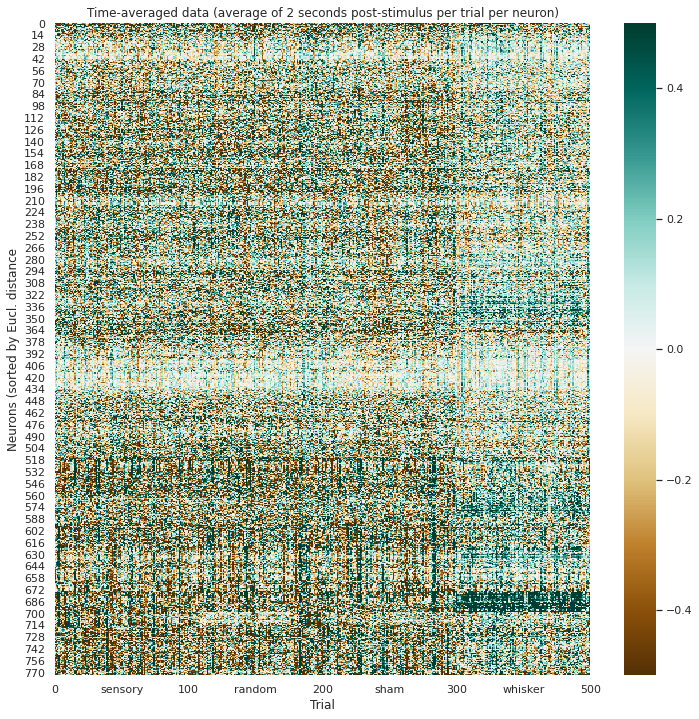

In [86]:
ax = dav.plot_raster_sorted_activity(Ses=tmp, create_new_time_aggr_data=True, 
                        sort_here=True,
                    plot_trial_type_list=['sensory', 'random', 'whisker', 'sham'])

In [84]:
[[0, 1], [2, 3]].()

AttributeError: 'list' object has no attribute 'join'

[0.04691993 0.01363621 0.01130082]
Subtracted LFA.


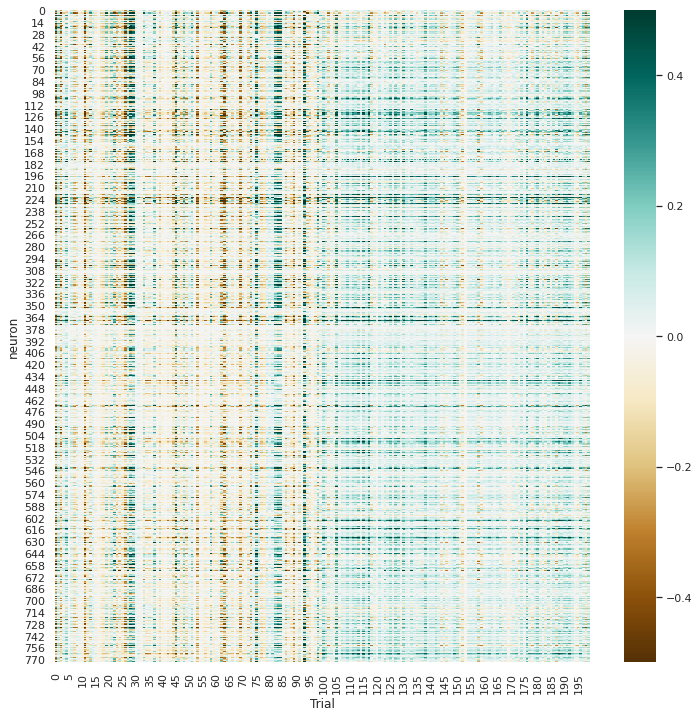

In [7]:
dav.plot_raster_sorted_activity(Ses=tmp)

In [5]:
tmp.find_all_discr_inds(region='s2')

Creating time-aggregate data set
Calculating d prime values


Shuffled discr not found!
Shuffled discr not found!
Shuffled discr not found!


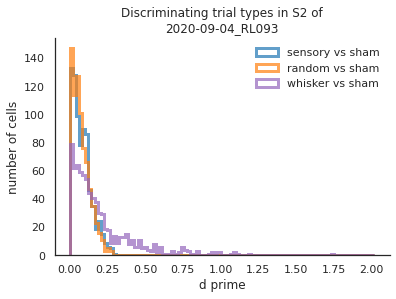

In [6]:
dav.plot_hist_discr(Ses=tmp, plot_density=False)

In [5]:
tmp.population_tt_decoder(tt_list=['whisker', 'sham'])

Time-aggregated activity object created
Decoder Cv loop 1/5
Score: 0.925
Decoder Cv loop 2/5
Score: 1.0
Decoder Cv loop 3/5
Score: 0.95
Decoder Cv loop 4/5
Score: 0.95
Decoder Cv loop 5/5
Score: 0.875
[0.925 1.    0.95  0.95  0.875]


In [8]:
# fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
# i_row, i_col = 0, 0
dict_sess_type_tt = {'sens': ['sensory', 'random', 'whisker'],
                     'proj': ['projecting', 'non_projecting']}
decoder_type = 'LDA'
n_sessions = 6
scores_dict = {}
for i_r, region in enumerate(['s1', 's2']):
    scores_dict[region] = {}
    for sess_type, tt_test_list in dict_sess_type_tt.items():
        print(f'Session type: {sess_type} in region {region}')
        scores_dict[region][sess_type] = {tt: np.zeros(n_sessions) for tt in tt_test_list}
        for i_s in tqdm(range(n_sessions)):
            tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type=sess_type)
            for i_tt, tt in enumerate(tt_test_list):
                tmp_score_arr = tmp.population_tt_decoder(tt_list=[tt, 'sham'], region=region,
                                                            verbose=0, decoder_type=decoder_type)
                scores_dict[region][sess_type][tt][i_s] = np.mean(tmp_score_arr)



  0%|          | 0/6 [00:00<?, ?it/s]

Session type: sens in region s1


  0%|          | 0/6 [00:00<?, ?it/s]

Session type: proj in region s1


  0%|          | 0/6 [00:00<?, ?it/s]

Session type: sens in region s2


  0%|          | 0/6 [00:00<?, ?it/s]

Session type: proj in region s2


100%|██████████| 6/6 [03:07<00:00, 31.23s/it]


In [16]:
scores_dict

{'s1': {'sens': {'sensory': array([0.835, 0.835, 0.785, 0.91 , 0.975, 0.905]),
   'random': array([0.92 , 0.915, 0.805, 0.97 , 0.98 , 0.985]),
   'whisker': array([0.915, 0.815, 0.82 , 0.835, 0.875, 0.785])},
  'proj': {'projecting': array([0.705, 0.895, 0.84 , 0.64 , 0.72 , 0.63 ]),
   'non_projecting': array([0.69 , 0.85 , 0.955, 0.72 , 0.79 , 0.735])}},
 's2': {'sens': {'sensory': array([0.56 , 0.49 , 0.515, 0.62 , 0.505, 0.575]),
   'random': array([0.5  , 0.41 , 0.5  , 0.5  , 0.49 , 0.485]),
   'whisker': array([0.94 , 0.615, 0.81 , 0.83 , 0.905, 0.665])},
  'proj': {'projecting': array([0.565, 0.475, 0.505, 0.485, 0.515, 0.52 ]),
   'non_projecting': array([0.5  , 0.47 , 0.46 , 0.53 , 0.505, 0.525])}}}

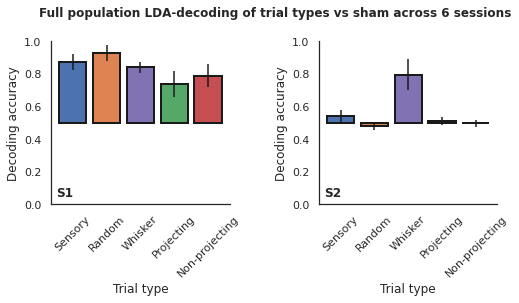

In [37]:
dav.bar_plot_decoder_accuracy(scores_dict=scores_dict)

Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum


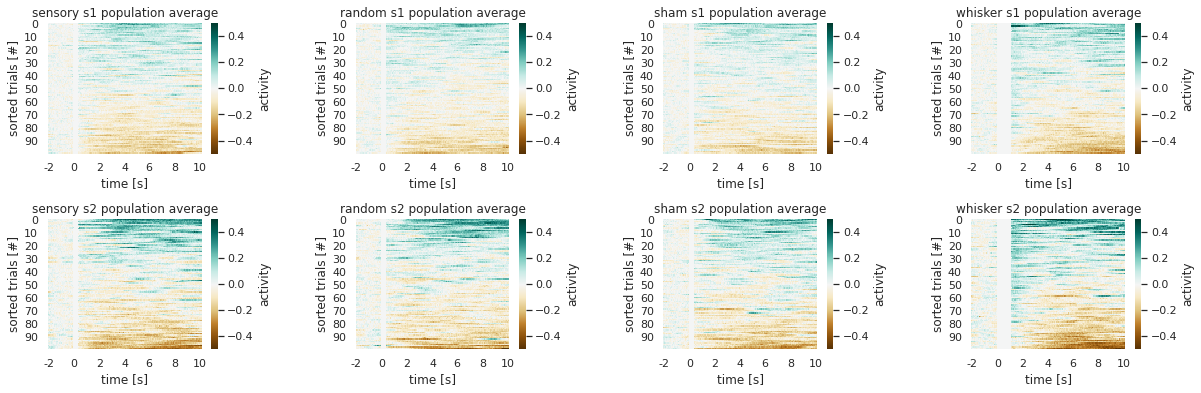

In [48]:
tmps = dav.plot_pop_av(Ses=tmp, region_list=['s1', 's2'], sort_trials_per_tt=True)

In [34]:
tmpsort, tmprevsort = tmp.sort_neurons(data=tmps.data)



Neurons sorted by sum


In [42]:
tmps.time

<xarray.DataArray 'time' (time: 182)>
array([-2.063474, -1.996543, -1.929611, -1.86268 , -1.795748, -1.728817,
       -1.661886, -1.594954, -1.528023, -1.461091, -1.39416 , -1.327228,
       -1.260297, -1.193366, -1.126434, -1.059503, -0.992571, -0.92564 ,
       -0.858708, -0.791777, -0.724845, -0.657914, -0.590983, -0.524051,
       -0.45712 , -0.390188, -0.323257, -0.256325, -0.189394, -0.122462,
       -0.055531,  0.0114  ,  0.078332,  0.145263,  0.212195,  0.279126,
        0.346058,  0.412989,  0.47992 ,  0.546852,  0.613783,  0.680715,
        0.747646,  0.814578,  0.881509,  0.948441,  1.015372,  1.082303,
        1.149235,  1.216166,  1.283098,  1.350029,  1.416961,  1.483892,
        1.550824,  1.617755,  1.684686,  1.751618,  1.818549,  1.885481,
        1.952412,  2.019344,  2.086275,  2.153206,  2.220138,  2.287069,
        2.354001,  2.420932,  2.487864,  2.554795,  2.621727,  2.688658,
        2.755589,  2.822521,  2.889452,  2.956384,  3.023315,  3.090247,
        3.157178,  3.22411 ,  3.291041,  3.357972,  3.424904,  3.491835,
        3.558767,  3.625698,  3.69263 ,  3.759561,  3.826492,  3.893424,
        3.960355,  4.027287,  4.094218,  4.16115 ,  4.228081,  4.295013,
        4.361944,  4.428875,  4.495807,  4.562738,  4.62967 ,  4.696601,
        4.763533,  4.830464,  4.897396,  4.964327,  5.031258,  5.09819 ,
        5.165121,  5.232053,  5.298984,  5.365916,  5.432847,  5.499779,
        5.56671 ,  5.633641,  5.700573,  5.767504,  5.834436,  5.901367,
        5.968299,  6.03523 ,  6.102161,  6.169093,  6.236024,  6.302956,
        6.369887,  6.436819,  6.50375 ,  6.570682,  6.637613,  6.704544,
        6.771476,  6.838407,  6.905339,  6.97227 ,  7.039202,  7.106133,
        7.173065,  7.239996,  7.306927,  7.373859,  7.44079 ,  7.507722,
        7.574653,  7.641585,  7.708516,  7.775447,  7.842379,  7.90931 ,
        7.976242,  8.043173,  8.110105,  8.177036,  8.243968,  8.310899,
        8.37783 ,  8.444762,  8.511693,  8.578625,  8.645556,  8.712488,
        8.779419,  8.846351,  8.913282,  8.980213,  9.047145,  9.114076,
        9.181008,  9.247939,  9.314871,  9.381802,  9.448733,  9.515665,
        9.582596,  9.649528,  9.716459,  9.783391,  9.850322,  9.917254,
        9.984185, 10.051116])
Coordinates:
  * time     (time) float64 -2.063 -1.997 -1.93 -1.863 ... 9.917 9.984 10.05
Attributes:
    units:    s

100%|██████████| 6/6 [02:10<00:00, 21.68s/it]


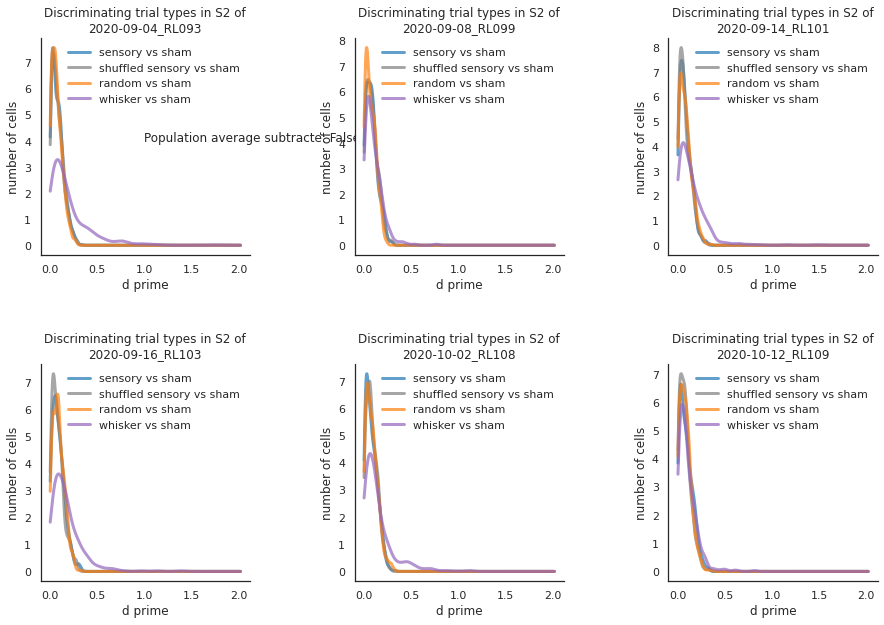

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s)
    tmp.find_all_discr_inds(region='s2', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        yscale_log=False, plot_hist=False, plot_kde=True,
                        show_all_shuffled=False)

    if i_row == 0 and i_col == 0:
        ax[i_row, i_col].text(x=1, y=4, s=f'Population average subtracte: {tmp.time_aggr_ds_pop_av_subtracted}')
    i_col += 1
    # break
    if i_col == 3:
        i_row += 1
        i_col = 0

100%|██████████| 6/6 [01:44<00:00, 17.41s/it]


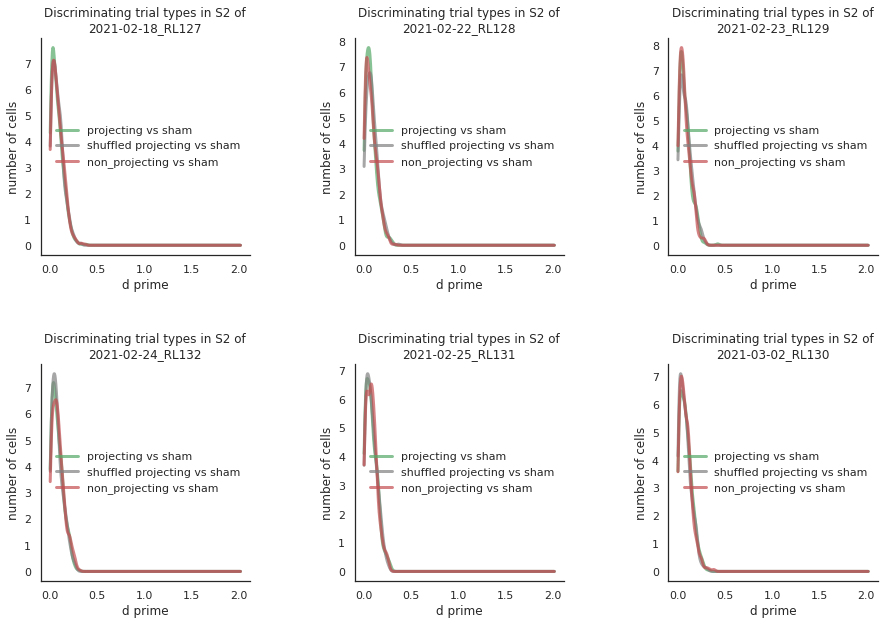

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type='proj')
    tmp.find_all_discr_inds(region='s2', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        plot_hist=False, plot_kde=True, show_all_shuffled=False)
    i_col += 1
    if i_col == 3:
        i_row += 1
        i_col = 0

100%|██████████| 6/6 [03:58<00:00, 39.82s/it]


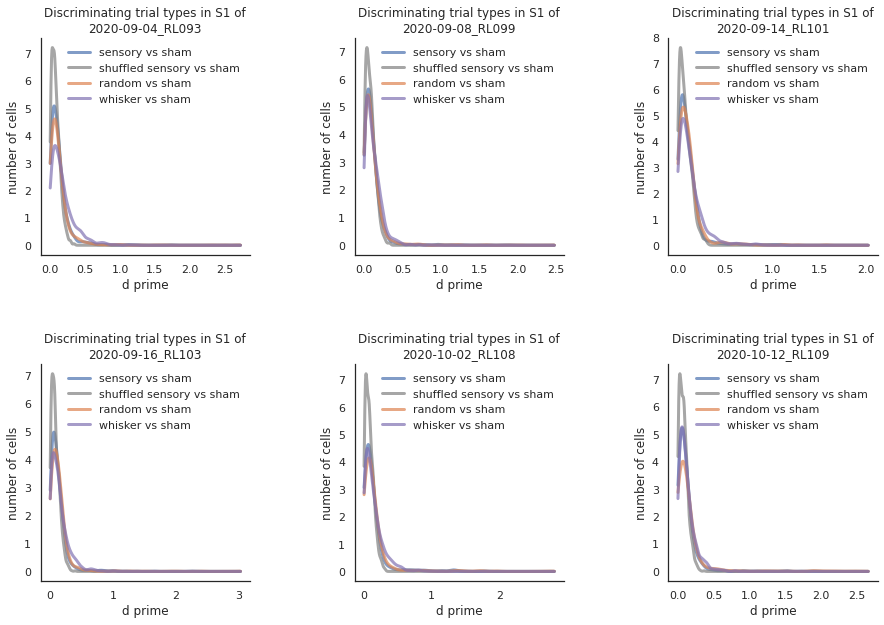

In [58]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type='sens')
    tmp.find_all_discr_inds(region='s1', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        plot_hist=False, plot_kde=True, yscale_log=False)
    i_col += 1
    if i_col == 3:
        i_row += 1
        i_col = 0

100%|██████████| 6/6 [02:28<00:00, 24.67s/it]


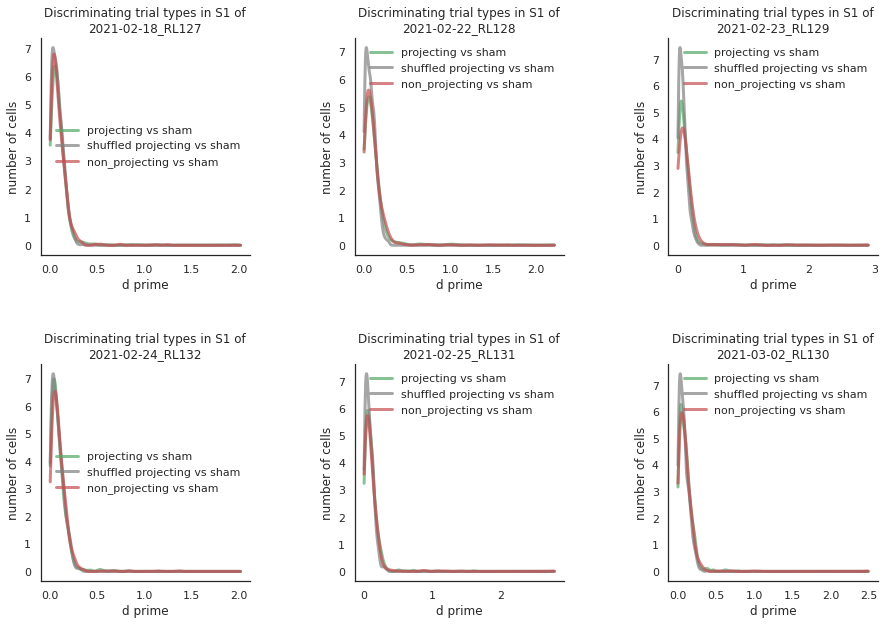

In [60]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type='proj')
    tmp.find_all_discr_inds(region='s1', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        plot_hist=False, plot_kde=True, show_all_shuffled=False)
    i_col += 1
    if i_col == 3:
        i_row += 1
        i_col = 0

In [122]:
for tt in ['whisker', 'sensory']:
    for bool_spcs in [True, False]:
        tmp_score_arr = tmp.population_tt_decoder(tt_list=[tt, 'sham'], region='s2',
                                                    verbose=0, decoder_type='LDA',
                                                     subtract_pcs=bool_spcs)
        print(f'{tt} vs sham, {bool_spcs} subtraction PCS')
        print(tmp_score_arr)
        print('----\n')



[0.0502188  0.02004048 0.01212633]
Subtracted LFA.
whisker vs sham, True subtraction PCS
[0.4   0.525 0.55  0.675 0.4  ]
----

whisker vs sham, False subtraction PCS
[0.925 1.    0.95  0.95  0.875]
----

[0.04808933 0.0132045  0.01020422]
Subtracted LFA.
sensory vs sham, True subtraction PCS
[0.5   0.5   0.35  0.525 0.425]
----

sensory vs sham, False subtraction PCS
[0.65  0.575 0.55  0.475 0.55 ]
----



In [123]:
for tt in ['whisker', 'sensory']:
    for bool_spcs in [True, False]:
        tmp_score_arr = tmp.population_tt_decoder(tt_list=[tt, 'sham'], region='s2',
                                                    verbose=0, decoder_type='LDA',
                                                     subtract_pcs=bool_spcs)
        print(f'{tt} vs sham, {bool_spcs} PC activity only')
        print(tmp_score_arr)
        print('----\n')



[0.05021881 0.02004049 0.01212616]
Subtracted LFA.
whisker vs sham, True PC activity only
[0.9   0.95  0.925 0.85  0.825]
----

whisker vs sham, False PC activity only
[0.925 1.    0.95  0.95  0.875]
----

[0.04808929 0.01320452 0.01020572]
Subtracted LFA.
sensory vs sham, True PC activity only
[0.475 0.4   0.625 0.45  0.5  ]
----

sensory vs sham, False PC activity only
[0.65  0.575 0.55  0.475 0.55 ]
----

